### Christian Roth und Andreas Waßmus:

# Major Assignment: Used Car Sales Analysis


### Kurs: Programming for Data Science
### Programmiersprache Python

Angewendete Pakte:

In [120]:
import pandas as pd
import numpy as np
#import seaborn as sns

### 1. Beschreibung Use Case

Der Verkauf von Kraftfahrzeugen (PKW) ist in Deutschland ein großer und wichtiger Markt. Untergliedert in Neu- und Gebrauchtwagen hat er in 2019 ein Volumen von 191,7 Mrd. EUR. Dabei macht der Verkauf von Gebrauchtwagen mit einen Umsatz von 84,7 Mrd. EUR 44,2% des Marktes aus. Der Gebrauchtwagen ist zu zwei Dritteln gewerblich und einem Dittel privat organisiert. Ca. 5 Mio. Deutsche überlegen sich in den kommenden Jahren einen neuen Gebrauchtwagen zuzulegen. (Quelle: destatis, abgerufen am 23.08.2019, https://de.statista.com/themen/1377/gebrauchtwagenhandel/)


Folie1.png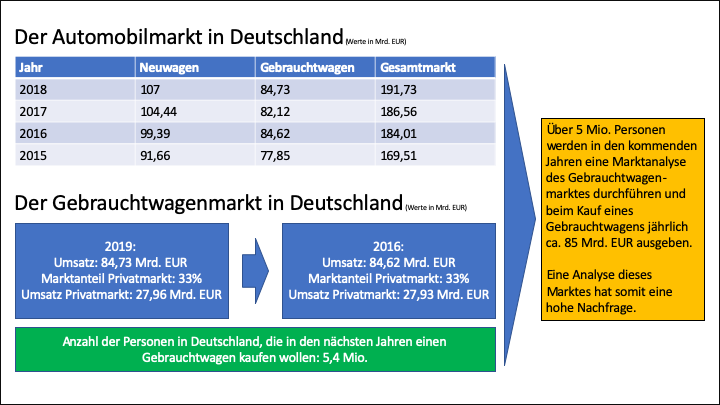




Im vorliegenden Assignment soll eine Analyse des Gebrauchtwagenmarktes in Deutschland durchgeführt werden. Dazu sollen die Verkäufe in diesem Teilsegments näher betrachtet werden. Um Verkaufsdaten zu generieren, wurde überlegt, Plattformen wie mobile.de zu crawlen und die Daten auszuwerten. Ein solcher Crawler hätte den Vorteil einen aktuellen Blick in den Gebrauchtwagenmarkt zu erhalten, ist aber recht umfangreich zu programmieren und hat das Risko, keine Daten zu bekommen, da Marktplätze ein Crawling ihrerseits verhindern. Daher wurde das Web nach frei verfügbaren Datensätzen über Gebrauchtwagenverkäufe durchsucht. Es wurde ein Datensatz in Kaggle aus dem Jahr 2016 gefunden, der sich sehr gut für diese Analyse nutzen lässt. Ausgehend von einem Privatmarktanteil im Gebrauchtwagenmarkt von 33% weißt das Jahr 2016 mit 27,93 Mrd. EUR zudem eine sehr ähnliche Größe wie das letzte Jahr 2018 aus. Somit ist auch die Aktualität bezogen auf die Marktgröße gegeben.

Im Zuge der Analyse wird der Datensatz mit weiteren Datenpunkten gezielt angereichert, um zusätzliche regionale bzw. geographische Aspekte sowie Unternehmenszugehörigkeiten von Marken darzustellen.


Im Rahmen des Assigments wird den folgenden Fragestellen zum privaten Gebrauchtwagenmarkt nachgegangen:

- Wie viele Gebrauchtfahrzeuge werden pro Jahr in Deutschland verkauft?
- Wie ist das Durchschnittsalter von Gebrauchtwagen?
- Wie ist der durchschnittliche Kilometerstand von Gebrauchtwagen im Privatmarkt?
- Wie ist der durchschnittliche Verkaufspreis der Fahrzeuge im Privatmarkt?
- Wo sind die Peise am teuersten, wo am günstigsten?

(alle Fragen von statista, sind aber Kostenpflichtig)

Weitere Fragestellungen:

Welche Marktanteile von Marken gibt es im Gebrauchtwagenmarkt?
- Wie sieht die Verteilung der Marktanteile in Bezug auf Automobilkonzerne dar?
- Gibt es einen Unterschied zwischen der Verteilung der Marktanteile bei Neuwagen und Gebrauchtwagen?

weitere Marktcharakteristika:
- Wie sieht die Verteilung bei Diesel und Benzin aus?
- Welche Fahrzeugform haben die Autos?
- Wie viel PS haben die Autos?
- Wie lange ist eine Anzeige durchschnittlich online, bis das Auto verkauft wird?

Wie entwickeln/unterscheiden sich die Preise? Welche Fahrzeuge erzielen höhere Verkaufspreise?
- Welche Merkmale eines Autos haben einen Einfluss auf die Angebotspreise? (Korrelationen)
- Wie sieht die Verteilung der Preise für PKW in Bezug auf das Zulassungsjahr aus?
- Wie sieht die Verteilung der Preise in Bezug auf Kilomterleistung aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Leistung von PKW aus?
- Wie sieht die Verteilung der Preise in Bezug auf die Kraftstoffart aus?
- Welche Marken erzielen die höchsten Preise?

Wie ist der Markt geografisch aufgeteilt?
- Wo werden besonders viele Autos angeboten bzw. verkauft?


### 2. Daten


Für die Analyse wird ein Datensatz aus Kaggle verwendet. Diese dort zur Verfügung gestellten Daten wurden im Jahr 2016 mit Scrapy von Ebay-Kleinanzeigen gecrawled. Es handelt sich um 371.528 Datensätze.

Datensatz: https://www.kaggle.com/orgesleka/used-cars-database




#### 1. Beschreibung und Einlesen der Daten:

Je Datensatz wurden folgende 19 Datenpunkte gesammelt:

- dateCrawled: Datum, wann die Anzeige das erste mal gecrawlt wurde (alle Feldwerte stammen von diesem Datum, Index)
- name: "Name" des Autos (Anzeigenname)
- seller: Gewerblicher oder privater Verkäufer
- offerType: Handelt es sich um Angebote oder Gesuche
- price : Der Angebotspreis der Anzeige (kein finaler Verkaufspreis) 
- abtest: Ausprägungen "test" und "control" (diese Spalte ist für die Analyse nicht relevant)
- vehicleType: Fahrzeugform, Kategorien von verschiedenen Fahrzeugtypen
- yearOfRegistration: Jahr der Erstzulassug
- gearbox: Getriebeart
- powerPS: Leistung in PS
- model: Modellname des Herstellers
- kilometer: Kilometerstand bei Verkauf
- monthOfRegistration: Monat der Erstzulassung
- fuelType: Kraftstoffart
- brand: Automarke
- notRepairedDamage: Nicht-reparierter Schaden am Auto (Variable lässt keine Aussage über die Höhe der unfallfreien Fahrzeuge zu
- dateCreated: Erstelldatum der Anzeige
- nrOfPictures: Fehlerhafter Spalte wird im Rahmen der Datenbereinigung aus Analyse entfernt
- postalCode: Postleitzahl
- lastSeenOnline: Wann wurde die Anzeige das letzte Mal vom crawler gesehen?






In [121]:
#Initialize relative path of csv-file
relpathCar="../MajorAssignment/used-cars-database/autos.csv"

#import csv-file into pandas df
df_carData=pd.read_csv(relpathCar,sep=",",encoding="latin-1", index_col=0)


In [122]:
print(df_carData.shape)
print('----------')
print(df_carData.columns)

(371528, 19)
----------
Index(['name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen'],
      dtype='object')


#### 2. Einbindung zusätzlicher Daten

Der Datensatz wurde dahingehend überprüft, ob es Sinn macht, an bestimmten Stellen Daten anzureichern. Hierzu kommen zwei Spalten in Betracht:
- brand
- postalCode

Zur Marke (brand) der PKWs wird eine CSV-Tabelle mit Konzernzugehörigkeiten der einzelnen Marken eingespielt. Diese CSV wurde selbst erstellt, da keine freiverfügbare Liste oder CSV-Datei gefunden wurde und hier ebenfalls ein Crawling-Prozess in Anbetracht des geringen Informationsgehalts dieser Datei zu aufwendig gewesen wäre. Daher war es effizienter und schneller diese Datei selber zu erstellen.

Bzgl. der Postleitzahlen (postalCode) wurden mehrer Datenbanken durchsucht und verschiedene CSV-Dateien gefunden, sodass zu den Postleitzahlen der Name und die Längen- und Breitengrade des Orts sowie dessen Einwohnerzahl hinzugefügt werden können. Diese Dateien wurden von http://www.fa-technik.adfc.de/code/opengeodb/PLZ.tab und https://www.suche-postleitzahl.org/downloads heruntergeladen (24.08.2019) und werden in diesem Abschnitt in einen Dataframe zusammengeführt


Used Car Data.jpg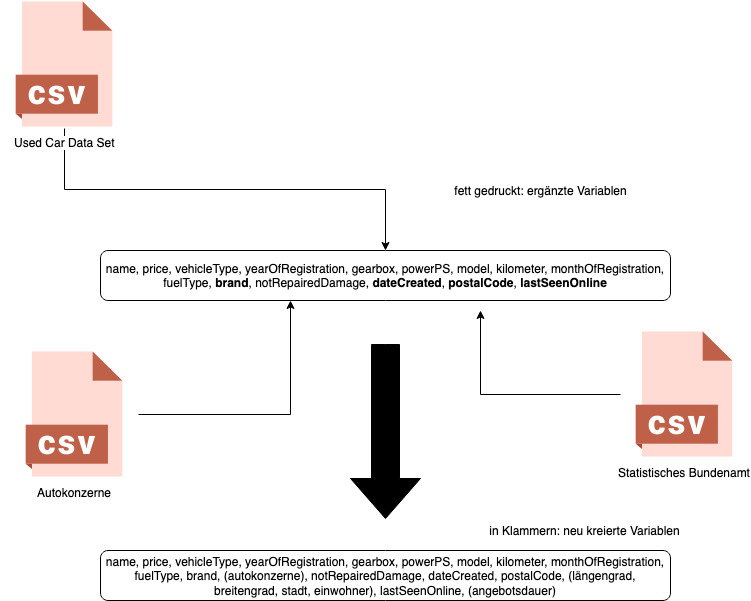

In [123]:
#Initialize relative path of csv-file for other data
relpathKON="../MajorAssignment/Autokonzerne.csv"
relpathPLZ="../MajorAssignment/PLZ.csv"
relpathEIN="../MajorAssignment/plz_einwohner.csv"

In [124]:
#Konzernmarken einlesen
df_companies=pd.read_csv(relpathKON,sep=";",encoding="UTF-8")

#Alternative wäre geopy gewesen, aber funktioniert bei sovielen Zeilen wegen HTTP429 To many requests nicht
df_lonlat = pd.read_csv(relpathPLZ, sep='\t', encoding="utf-8")

#Einwohner je PLZ einlesen
df_population=pd.read_csv(relpathEIN,sep=",",encoding="UTF-8")

In [125]:
#df_population und df_lonlat auf Basis von plz zusammenführen
df_postalCodeInfo = df_lonlat.merge(df_population, on='plz', how='left')
df_postalCodeInfo.head()

,#loc_id,plz,lon,lat,Ort,einwohner
0,5078,1067,13.721068,51.060034,Dresden,11957.0
1,5079,1069,13.738907,51.039559,Dresden,25491.0
2,5080,1097,13.743967,51.066745,Dresden,14811.0
3,5081,1099,13.828980,51.092619,Dresden,28021.0
4,153646,1108,13.828980,51.092619,Dresden,5876.0


### 3. Data preparation

In diesem Abschnitt werden die Daten aufbereitet und bereinigt, so dass sie im Anschluss analysiert werden können. 

#### Übersicht und Einfinden in die Datensätze

In [126]:
#Rename postalCode zu plz
df_carData=df_carData.rename(columns = {'postalCode':'plz'})
#df_carData #zur Überprüfung

Die Zeit, die eine Anzeige online ist, gibt Aufschluss darüber, wie groß die Nachfrage nach dem PKW ist und wie gut das Angebot war. Um die Online-Dauer einer Anzeige zu berechnen, wird die Spalte "offerTime" hinzugefügt und wie folgt berechnet:

Erstellungsdatum der Anzeige - Letztmaliger Anzeigenaufruf möglich = Anzahl der Tage Online

In [127]:
#Column dateCreated & lastSeen in Datetime umwandeln 
#dt.normalize() um die Anzeige und nicht dtype selbst zu verändern
df_carData["dateCreated"] = pd.to_datetime(df_carData["dateCreated"]).dt.normalize()
df_carData["lastSeen"] = pd.to_datetime(df_carData["lastSeen"]).dt.normalize()

#Added Column offerTime to calculate how long the car was online before it was sold 
df_carData["offerTime"]  = (df_carData["lastSeen"] - df_carData["dateCreated"]).dt.days

#Check dtypes, ob Umwandlung erfolgreich.
#df_carData.dtypes
df_carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 2016-03-24 11:52:17 to 2016-03-07 19:39:19
Data columns (total 20 columns):
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null datetime64[ns]
nrOfPictures           371528 non-null int64
plz                    371528 non-null int64
lastSeen               371528 non-

In [128]:
#show head of carData df
df_carData.head(5)

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,,,,,
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07,14
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07,14
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05,22
2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17,0
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06,6


#### Umgang mit fehlenden und nicht benötigten Werten:

##### Fehlende Werte:

Grundsätzlich gibt es drei Möglichkeiten, mit den fehlenden Werten umzugehen: 

- 1. Wir löschen alle unvollständigen Datensätze.
- 2. Wir belassen die unvollständigen Datensätze im Dataset und verwenden für bestimmte Analyse nur die vollständigen Datensätze.
- 3. Wir ersetzen die fehlenden Werte.

Für die hier durchgeführte deskriptive Analyse reicht es zunächst aus, die fehlenden Werte (NaN values) im Datensatz zu belassen. Zur eindeutigen Kennzeichnung werden diese mit einen (-) ersetzt. Wir gehen somit mit Option 2 vor und werden, falls notwendig, für bestimmte deskriptive Analysen (bspw. Korrelationen) nur vollständige Datensätze zulassen. Für tiefergehende Analysen ist zu prüfen, inwieweit diese Werte ersetzt werden können oder ob man mit Option 1 verfahren muss.

Insgeamt gibt es 5 Spalten mit fehlenden Werten:

In [129]:
#Check NaN values 
df_carData.isna().sum()

name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
plz                        0
lastSeen                   0
offerTime                  0
dtype: int64

NaN-Werte werden mit "-" ersetzt. Neben diesen Werten gibt es beim Attribut "monthOfRegistration" den Wert 0 als fehlenden Wert oder keine Angabe. Dieser Wert wird nicht mit"-"ersetzt, da es ein numerisches Feld ist und ansonsten das Attribut nicht für weitere Kalkulationen benutzt werden kann.

In [130]:
#Fill missing values with "-"
df_carData = df_carData.fillna("-")
#df_carData.head()

Erneute Überprüfung ob alle fehlenden Werte ersetzt wurden

In [131]:
df_carData.isna().sum()

name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
plz                    0
lastSeen               0
offerTime              0
dtype: int64

##### Nicht benötigte Attribute

Im nächsten Schritt wird der Datensatz um Gesuche (beim Attribut "offerType") bereinigt, sodass nur Angebote im Datensatz vorhanden sind. Dadurch verliert das Attribut "offerType" seine Daseinsberechtigung und kann gelöscht werden. Ebenso wird mit dem Attribut "seller" verfahren. Zusätzlich werden die Spalten "nrOfPictures" (Fehler beim crawlen) und "abtest" gelöscht, da diese Spalten keinen Mehrwert für die nachfolgenden Analysen generieren und somit ebenfalls nicht benötigt werden.

In [132]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["offerType"].value_counts() 

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [133]:
#12 Gesuche löschen -> 371516 Angebote...
df_carData = df_carData[df_carData.offerType != "Gesuch"]

In [134]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["seller"].value_counts() 

privat        371513
gewerblich         3
Name: seller, dtype: int64

In [135]:
#3 gewerbliche Angebote löschen -> 371513 Angebote...
df_carData = df_carData[df_carData.seller != "gewerblich"]

In [136]:
#Löschen der zuvor genannten Spalten - delete the columns without having to reassign (inplace)
df_carData.drop(['nrOfPictures','seller', 'offerType', 'abtest'], axis=1, inplace=True)

In [137]:
print(df_carData.shape)

(371513, 16)


Der Daten wurden somit auf 371513 Datensätze mit 16 Attributen reduziert.

Bei der Sichtung der Daten ist auffällig, dass viele PKW zum Preis 0 EUR angeboten werden und bei den angeboten weiterhin Begriffe wie Suche, Ankauf, Tausch, Schenkung, u.w. auftauchen. Schaut man sich dies genauer ist, so ist das zu einem großen Anteil mit dem Preis 0-100 EUR verbunden. Daher werden zunächst alle Datensätze mit dem Preis <100 EUR gelöscht und anschließend der Datensatz gezielt nach Suchbegriffen gefiltert und bereinigt.

In [138]:
#10772 Preis 0 löschen -> 360741 Angebote...
#df_carData = df_carData[df_carData.price != 0]

In [156]:
#10772 Preis <100 EUR löschen -> 358199 Angebote...
df_carData = df_carData[df_carData.price >= 100]

# >500.000 EUR löschen -> 351858 Angebote...
df_carData = df_carData[df_carData.price < 500000]

Spalte PS ist ebenfalls auffällig, entweder falsch befüllt oder Schwachsinn
0= fehlender Wertn, alles größer 700 können wir in Wert 0 umwandeln

In [ ]:
#df_carData["powerPS"].value_counts() 

In [157]:
#Spalte name in lowercase
df_carData = df_carData.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

#Datensätze löschen, welche die nachfolgenden Begriffe enthalten ->351926 Angebote...
df_carData = df_carData[~df_carData.name.str.contains("such")]
df_carData = df_carData[~df_carData.name.str.contains("ankauf")]
df_carData = df_carData[~df_carData.name.str.contains("tausch")]
df_carData = df_carData[~df_carData.name.str.contains("abholung")]
df_carData = df_carData[~df_carData.name.str.contains("schlacht")]
df_carData = df_carData[~df_carData.name.str.contains("schenk")]

In [167]:
df_carData.loc[df_carData['powerPS'] >500]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,
2016-03-31 21:59:23,mercedes_benz_ml_63_amg_4matic_7g_tronic,21500,suv,2007,automatik,510,m_klasse,150000,4,lpg,mercedes_benz,nein,2016-03-31,33178,2016-04-06,6
2016-03-22 20:52:00,toyota_corolla,3200,kleinwagen,2004,manuell,1398,corolla,5000,6,benzin,toyota,nein,2016-03-22,22043,2016-03-22,0
2016-03-16 11:41:35,ferrari_california_f1,120000,cabrio,2012,automatik,666,-,20000,7,benzin,sonstige_autos,nein,2016-03-16,80331,2016-03-21,5
2016-04-03 20:31:00,mitsubishi_colt_diesel_1_5,3100,limousine,2005,manuell,953,colt,150000,4,diesel,mitsubishi,nein,2016-04-03,60326,2016-04-07,4
2016-03-29 19:44:48,verkauf__bastler__export,500,kombi,1999,manuell,1001,astra,150000,7,benzin,opel,-,2016-03-29,33154,2016-04-06,8
2016-03-30 14:47:21,mercedes_benz_cls_63_amg_7g_tronic,27500,coupe,2006,automatik,514,andere,150000,8,benzin,mercedes_benz,nein,2016-03-30,68309,2016-04-07,8
2016-03-31 23:50:47,daewoo_chevrollet_matiz_2002_zu_verkaufen,599,kleinwagen,2002,manuell,603,matiz,5000,11,benzin,chevrolet,ja,2016-03-31,44379,2016-04-01,1
2016-03-14 15:54:34,fiat_grande_punto_letzter_tag_!,3000,kleinwagen,2009,manuell,771,punto,125000,0,benzin,fiat,-,2016-03-14,40721,2016-03-14,0
2016-03-31 19:48:22,auto_opel_corsa_b,600,kleinwagen,1996,manuell,603,corsa,150000,8,benzin,opel,ja,2016-03-31,70327,2016-04-06,6


In [165]:
print(df_carData.shape)

(351858, 16)


#### Einbinden von Postleitzahlen, Einwohner und Fläche

Zunächst wird die Spalte "postalCode" aus dem carData Dataframe extrahiert und in ein neues Dataframe geschrieben. 

In [168]:
#Create df with unique postalCode values from carData
df_carData_postalCode = pd.DataFrame(df_carData['plz'].unique(),  columns=['plz']) 
df_carData_postalCode.head()

,plz
0,70435
1,66954
2,90480
3,91074
4,60437


Im Anschluss daran wird das anfangs eingelesene Dataframe "df_postalCodeInfo" mit dem soeben erstellen Dataframe zusammengeführt. 

In [169]:
df_locationData = df_carData_postalCode.merge(df_postalCodeInfo, on='plz' )

In [170]:
df_locationData.head()

,plz,#loc_id,lon,lat,Ort,einwohner
0,70435,9703,9.159157,48.830653,Stuttgart,206.0
1,66954,9414,7.564295,49.202121,Pirmasens,10417.0
2,90480,11724,11.132551,49.447293,Nürnberg,18393.0
3,91074,11774,10.878277,49.572095,Herzogenaurach,22222.0
4,60437,9033,8.678966,50.199217,Frankfurt am Main,3123.0


Abschließend werden für dieses DF ebenfalls die NaN-Werte geprüft und ggf. gelöscht.

In [171]:
#Check missing values 
df_locationData.isna().sum()

plz           0
#loc_id       0
lon           0
lat           0
Ort           0
einwohner    66
dtype: int64

In [172]:
df_locationData = df_locationData[pd.notnull(df_locationData['einwohner'])]

In [173]:
df_locationData.isna().sum()

plz          0
#loc_id      0
lon          0
lat          0
Ort          0
einwohner    0
dtype: int64

## Erstellung von analysefähigen Dataframes

Zunächst bauen wir einen Datensatz, welcher lediglich die Autos der Jahre 1986-2016 beinhaltet. Damit werden Oldtimer ausgeschlossen. 

## TODO

In [174]:
#Select Cars with yearOfRegistration between 1986 and 2016
df_normalCars = df_carData[(df_carData.yearOfRegistration >= 1986) & (df_carData.yearOfRegistration <= 2016)]

In [175]:
#Select Cars with yearOfRegistration between 1945 and 1986
df_oldtimerCars = df_carData[(df_carData.yearOfRegistration >= 1945) & (df_carData.yearOfRegistration <= 1986)]

In [176]:
#Select Cars with yearOfRegistration between 1945 and 2016
df_allCars = df_carData[(df_carData.yearOfRegistration >= 1945) & (df_carData.yearOfRegistration <= 2016)]

In [177]:
#df_allCars['yearOfRegistration'].value_counts()

In [179]:
#df_carData.head()

### 4. Analyse des Marktes

In [180]:
df_oldtimerCars.loc[df_oldtimerCars['yearOfRegistration'] == 1946]

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,plz,lastSeen,offerTime
dateCrawled,,,,,,,,,,,,,,,,
2016-03-17 11:52:18,oldtimer_1946_buick_roadmaster_sedanette_2_doo...,27600,coupe,1946,manuell,0,-,5000,7,benzin,sonstige_autos,nein,2016-03-17,38275,2016-03-25,8
2016-03-24 07:56:34,oldtimer_lkw_opel_blitz_kipper,1500,andere,1946,manuell,0,-,150000,12,benzin,sonstige_autos,-,2016-03-24,66133,2016-03-24,0


In [97]:
#Könnten wir ein pie chart drauß machen mit denen > 10.000 (Rest Sonstige)
df_carData['price'].value_counts()

0          10772
500         5670
1500        5394
1000        4649
1200        4594
2500        4438
600         3819
3500        3792
800         3784
2000        3431
999         3364
750         3203
650         3150
4500        3053
850         2946
2200        2936
700         2936
1800        2886
900         2874
950         2793
1100        2771
1300        2757
300         2731
3000        2720
550         2591
1600        2570
5500        2543
350         2514
400         2442
1250        2441
           ...  
22599          1
4782           1
8008           1
20290          1
50100          1
3245           1
58800          1
2795000        1
75400          1
10830          1
588            1
31555          1
3755           1
19269          1
14666          1
28995          1
4175           1
10670          1
77             1
8265           1
145900         1
2730           1
12973          1
42840          1
30530          1
23456          1
171000         1
21830         

Idee...

Man könnte mit der Formel basierend auf den Verkaufspreisen den ursprünglichen Neuwagenpreis errechnen. Allerdings ist das schon sehr generell, da diese aus dem gesamten Datensatz abgeleitet wurde.
http://orgesleka.blogspot.com/2016/11/tabelle-zum-wertverlust-pro-jahr-bei.html

Eine individuelle regression zu bauen geht aus meiner Sicht über das Assignment hinausnicht.

In [181]:
df_brand = df_normalCars.loc[df_normalCars['brand'] == 'mercedes_benz']

corr = df_brand.corr()
corr.style.background_gradient()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,plz,offerTime
price,1,0.525435,0.205509,-0.487167,0.0413582,0.0346438,0.116539
yearOfRegistration,0.525435,1,0.083583,-0.395061,0.046796,0.00667799,0.0500214
powerPS,0.205509,0.083583,1,-0.0385852,0.0220449,0.00829983,0.0338894
kilometer,-0.487167,-0.395061,-0.0385852,1,-0.0186055,-0.0360193,-0.0726291
monthOfRegistration,0.0413582,0.046796,0.0220449,-0.0186055,1,-0.0152631,-0.00400841
plz,0.0346438,0.00667799,0.00829983,-0.0360193,-0.0152631,1,0.0254276
offerTime,0.116539,0.0500214,0.0338894,-0.0726291,-0.00400841,0.0254276,1


In [182]:
df_brand.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,plz,offerTime
count,31860.000000,31860.000000,31860.000000,31860.000000,31860.000000,31860.000000,31860.000000
mean,8485.997301,2002.918895,156.640333,130883.082235,6.154677,51319.476303,9.110891
std,10289.930859,5.961232,189.821853,36021.209404,3.572645,24817.489405,8.851622
min,100.000000,1986.000000,0.000000,5000.000000,0.000000,1067.000000,0.000000
25%,2300.000000,1999.000000,116.000000,125000.000000,3.000000,30966.000000,2.000000
50%,5100.000000,2003.000000,150.000000,150000.000000,6.000000,50374.000000,6.000000
75%,11500.000000,2007.000000,190.000000,150000.000000,9.000000,71336.000000,14.000000
max,368000.000000,2016.000000,20000.000000,150000.000000,12.000000,99986.000000,300.000000


In [183]:
#Ausprägungen einer Spalte anzeigen lassen
df_carData["model"].value_counts()

golf                  28406
andere                25095
3er                   19463
-                     16685
polo                  12332
corsa                 11883
astra                 10270
a4                     9813
passat                 9781
c_klasse               8483
5er                    8075
e_klasse               7268
a3                     6417
focus                  5721
a6                     5684
fiesta                 5516
transporter            5259
2_reihe                4713
twingo                 4683
fortwo                 4229
a_klasse               4185
vectra                 3962
1er                    3792
touran                 3457
mondeo                 3422
clio                   3399
3_reihe                3369
punto                  3150
zafira                 2930
megane                 2757
                      ...  
lanos                    81
range_rover_evoque       65
crossfire                64
gl                       62
nubira              